In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#QUESTION DE MARC

In [23]:
#INTEGRATION DES DONNEES DANS LES DATAFRAMES

In [24]:
df_sous_nu = pd.read_csv('sous_nutrition_.csv', sep=';')
df_pop = pd.read_csv('population_.csv', sep = ';')
df_dispo_alim = pd.read_csv('dispo_alimentaire_2_.csv', sep =';')
df_aide = pd.read_csv('aide_alimentaire_.csv', sep=';')

In [25]:
#QUESTION 1 de MARC : Proportion de sous_nutrition

#Création du dataframe, renommage des colonnes, et liaison
df_pop = df_pop.rename(columns={'Valeur':'Population'})
df_prop = pd.merge(df_pop,df_sous_nu, on=['Zone','Année'], how ='left')
#Somme de sous nutrition
sous_nutrition = df_prop['Valeur'].sum()
#Somme de la population
Population = df_prop['Population'].sum()

#Calcule de la proportion mondiale
proportion_mondiale = df_prop['Valeur'].sum()/df_prop['Population'].sum()
proportion_mondiale = proportion_mondiale*100
proportion_mondiale = proportion_mondiale.round(2)

print('La proportion des personnes en sous nutrition est de : ', proportion_mondiale, '%')
print('La population mondiale est de : ', Population)
print('Sous_nutrition : ', sous_nutrition)

La proportion des personnes en sous nutrition est de :  7.12 %
La population mondiale est de :  7548134111
Sous_nutrition :  537700000.0


In [26]:
#QUESTION 2 MARC : Nombre théorique de personnes qui pourraient etre nourries 

#On regroupe les deux dataframes
dispo_alim_pays = pd.merge(df_dispo_alim, df_pop, on=['Zone'] )
Population = df_prop['Population'].sum()
#Calcule de la dispo_kcal/an = dispo_alimentaire*365
dispo_alim_pays["disponibilité_kcal_par_an"] =  dispo_alim_pays["Disponibilité alimentaire (Kcal/personne/jour)"]*365
dispo_alim_pays['dispo_alim_kcal'] = dispo_alim_pays["disponibilité_kcal_par_an"]*dispo_alim_pays['Population']
dispo_ali_monde = round(dispo_alim_pays['dispo_alim_kcal'].sum(skipna =True),2)
print("l'alimentation à disposition pour l'an dans le monde est de : ",dispo_ali_monde," Kcal")
Consommation_an_kcal = 2500*365
humain_nourris_kcal = dispo_ali_monde / Consommation_an_kcal
print("Sur une base de consommation journalière de 2500 kcal, pour l'an cela reviendrai à nourrir :",round(humain_nourris_kcal,2))

# Proportion humain_nourris_kcal/Population
Proportion = round((humain_nourris_kcal/Population),2)

print("La proportion est de : ", Proportion, " %")

l'alimentation à disposition pour l'an dans le monde est de :  7731489402627990.0  Kcal
Sur une base de consommation journalière de 2500 kcal, pour l'an cela reviendrai à nourrir : 8472865098.77
La proportion est de :  1.12  %


In [27]:
#QUESTION 3 MARC : Nombre théorique de personnes qui pourraient etre nourries avec des produits végétaux

#Jointure des deux DF avec comme lien la Zone (selection des colonnes)
dt_dispo_alim_theo1_ = dispo_alim_pays[['Zone', 'Origine', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Population']]
#Selection végétale
dt_dispo_alim_veg = dt_dispo_alim_theo1_.loc[dt_dispo_alim_theo1_['Origine'] == 'vegetale',:]
dt_dispo_alim_veg = dt_dispo_alim_veg.reset_index()
Population = df_prop['Population'].sum()
#Calcule de la disponibilité kcal/an et dispo ali_kcal 
dt_dispo_alim_veg['disponibilité_kcal_par_an'] = dt_dispo_alim_veg["Disponibilité alimentaire (Kcal/personne/jour)"]*365
dt_dispo_alim_veg['dispo_alim_kcal'] = dt_dispo_alim_veg["disponibilité_kcal_par_an"]*dt_dispo_alim_veg['Population']
dt_dispo_alim_veg = dt_dispo_alim_veg.groupby(['Zone','Origine']).sum()
dt_dispo_alim_veg = dt_dispo_alim_veg.reset_index()
dispo_ali_monde = round(dt_dispo_alim_veg['dispo_alim_kcal'].sum(skipna =True),2)
print("L'alimentation végétale a disposition pour l'année dans le monde est de : ",dispo_ali_monde," Kcal")
Consommation_an_kcal = 2500*365
humain_nourris_kcal = dispo_ali_monde / Consommation_an_kcal
print("Sur une base de consommation journalière de 2500 kcal, pour l'année cela reviendrai à nourrir avec des produits végétaux :",round(humain_nourris_kcal,2), "personnes")

# Proportion humain_nourris_kcal/Population
Proportion = round((humain_nourris_kcal/Population),2)

print("La proportion est de : ", Proportion, " %")

L'alimentation végétale a disposition pour l'année dans le monde est de :  6369070937911640.0  Kcal
Sur une base de consommation journalière de 2500 kcal, pour l'année cela reviendrai à nourrir avec des produits végétaux : 6979803767.57 personnes
La proportion est de :  0.92  %


In [28]:
#QUESTION 4 de MARC : Utilisation de la disponibilité intérieur

#Utilisation de la disponibilité intérieur

#Remplacement des Nan en 0
df_dispo_alim.fillna(0, inplace = True)
#Calcule de dispo interieur
df_dispo_alim['Dispo_interieur']=df_dispo_alim['Semences']+df_dispo_alim['Traitement']+df_dispo_alim['Pertes']+df_dispo_alim['Nourriture']+df_dispo_alim["Aliments pour animaux"]+df_dispo_alim["Autres Utilisations"]
#Calcule de la dispo interieur pour les humains
df_dispo_alim['Dispo_interieur_humain']=df_dispo_alim['Semences']+df_dispo_alim['Traitement']+df_dispo_alim['Nourriture']+df_dispo_alim["Autres Utilisations"]
#Selection des colonnes
dt_dispo_alim_interieur = df_dispo_alim[['Zone', 'Produit','Origine',"Aliments pour animaux",'Nourriture','Pertes','Semences','Traitement',"Autres Utilisations"]]
#On regroupe sur la Zone pour faire une somme
dt_dispo_alim_interieur = dt_dispo_alim_interieur.groupby(['Zone']).sum()
#On tourne le tableau pour avoir les colonnes en lignes 
dt_dispo_alim_interieur = dt_dispo_alim_interieur.sum(axis=0).to_frame()
#Reinitialisation de l'index de ligne
dt_dispo_alim_interieur = dt_dispo_alim_interieur.reset_index()
#Renommage de colonne
dt_dispo_alim_interieur.rename(columns = {'index': 'Type', 0:'Total'}, inplace = True)
dt_dispo_alim_interieur

,Type,Total
0,Aliments pour animaux,1304245.0
1,Nourriture,4876258.0
2,Pertes,453698.0
3,Semences,154681.0
4,Traitement,2204687.0
5,Autres Utilisations,865023.0


([<matplotlib.patches.Wedge at 0x171823d0ac0>,
 [Text(1.0063537450463638, 0.4441307688408431, 'Aliments pour animaux'),
  Text(-0.7999957113477486, 0.754987987868158, 'Nourriture'),
  Text(-0.646979358138829, -0.8896166085130544, 'Pertes'),
  Text(-0.4634678736291093, -0.9975958751487057, 'Semences'),
  Text(0.34281899744560523, -1.0452153534034938, 'Traitement'),
  Text(1.0584724548168585, -0.29939282288320446, 'Autres Utilisations')],
 [Text(0.5489202245707439, 0.24225314664045985, '13.23%'),
  Text(-0.43636129709877197, 0.41181162974626795, '49.46%'),
  Text(-0.35289783171208855, -0.4852454228253023, '4.60%'),
  Text(-0.25280065834315046, -0.5441432046265667, '1.57%'),
  Text(0.18699218042487556, -0.5701174654928147, '22.36%'),
  Text(0.5773486117182863, -0.1633051761181115, '8.77%')])

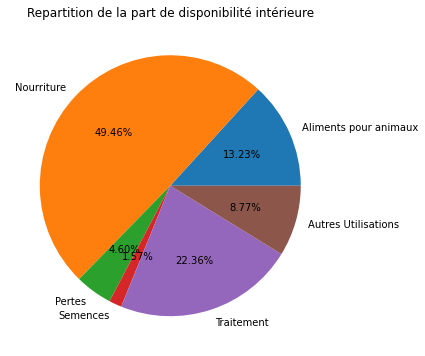

In [29]:
#Definition de la surface du graphique
plt.figure(figsize=(10,6))
#Titre
plt.title("Repartition de la part de disponibilité intérieure")
#Création du Graphique (Camembert)
plt.pie(x = dt_dispo_alim_interieur['Total'], labels = dt_dispo_alim_interieur['Type'], autopct = '%.2f%%')

In [30]:
#QUESTION 4 (bis) de MARC : Utilisation de la disponibilité intérieur

#Utilisation de la disponibilité intérieur
df_dispo_alim.fillna(0, inplace = True)
#Calcule de dispo interieur
df_dispo_alim['Dispo_interieur']=df_dispo_alim['Semences']+df_dispo_alim['Traitement']+df_dispo_alim['Pertes']+df_dispo_alim['Nourriture']+df_dispo_alim["Aliments pour animaux"]+df_dispo_alim["Autres Utilisations"]
#Calcule de la dispo interieur pour les humains
df_dispo_alim['Dispo_interieur_humain']=df_dispo_alim['Semences']+df_dispo_alim['Traitement']+df_dispo_alim['Nourriture']+df_dispo_alim["Autres Utilisations"]
#Selection des colonnes
dt_dispo_alim_interieur = df_dispo_alim[['Zone', 'Produit','Origine','Dispo_interieur_humain',"Aliments pour animaux",'Pertes']]
#On regroupe sur la Zone pour faire une somme
dt_dispo_alim_interieur = dt_dispo_alim_interieur.groupby(['Zone']).sum()
#On tourne le tableau pour avoir les colonnes en lignes 
dt_dispo_alim_interieur = dt_dispo_alim_interieur.sum(axis=0).to_frame()
#Reinitialisation de l'index de ligne
dt_dispo_alim_interieur = dt_dispo_alim_interieur.reset_index()
#Renommage de colonne
dt_dispo_alim_interieur.rename(columns = {'index': 'Type', 0:'Total'}, inplace = True)
dt_dispo_alim_interieur

,Type,Total
0,Dispo_interieur_humain,8100649.0
1,Aliments pour animaux,1304245.0
2,Pertes,453698.0


([<matplotlib.patches.Wedge at 0x171824375e0>,
 [Text(-0.9318662763776866, 0.5844871623483147, 'Dispo_interieur_humain'),
  Text(0.8379341469815627, -0.7126474340950657, 'Aliments pour animaux'),
  Text(1.088523507334042, -0.15848209356642193, 'Pertes')],
 [Text(-0.5082906962060108, 0.3188111794627171, '82.17%'),
  Text(0.45705498926267046, -0.3887167822336722, '13.23%'),
  Text(0.5937400949094773, -0.08644477830895742, '4.60%')])

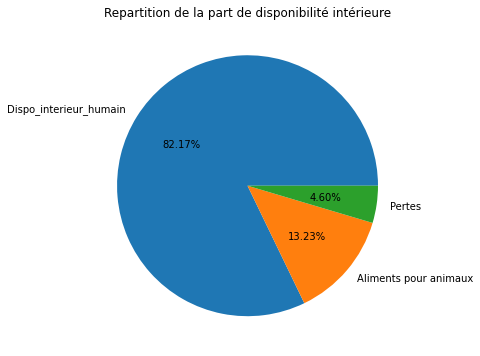

In [31]:
#Definition de la surface du graphique
plt.figure(figsize=(10,6))
#Titre
plt.title("Repartition de la part de disponibilité intérieure")
#Création du Graphique (Camembert)
plt.pie(x = dt_dispo_alim_interieur['Total'], labels = dt_dispo_alim_interieur['Type'], autopct = '%.2f%%')

In [32]:
#QUESTION DE MELANIE

In [33]:
#QUESTION 1 de Mélanie : Proportion de personnes sous_alimentées par pays la plus forte

#Jointure de la df sous_nutrition et Population
df_prop = pd.merge(df_sous_nu,df_pop, on=['Zone','Année'], how ='left')
#Calcule de la proportion par pays
df_prop['Proportion_par_pays']= df_prop['Valeur']/df_prop['Population']
#Tri par ordre croissant
df_prop= df_prop.sort_values('Proportion_par_pays', ascending =False).head(10)
df_prop

,Zone,Année,Valeur,Population,Proportion_par_pays
51,Dominique,2017,100000,71458.0,1.399423
164,Saint-Vincent-et-les Grenadines,2017,100000,109827.0,0.910523
98,Kiribati,2017,100000,114158.0,0.875979
167,Sao Tomé-et-Principe,2017,100000,207089.0,0.482884
78,Haïti,2017,5300000,10982366.0,0.482592
157,République populaire démocratique de Corée,2017,12000000,25429825.0,0.471887
108,Madagascar,2017,10500000,25570512.0,0.410629
103,Libéria,2017,1800000,4702226.0,0.382797
100,Lesotho,2017,800000,2091534.0,0.382494
183,Tchad,2017,5700000,15016753.0,0.379576


In [34]:
#QUESTION 2 Mélanie : Bénéficer le plus d'aide depuis 2013

#Sélection des colonnes
df_aide_ = df_aide[['Zone','Valeur']]
#Réinitialisation des index de la dataframe
df_aide_.reset_index()
#Regroupement des colonnes sur la Zone et somme
df_aide_ = df_aide_.groupby(['Zone']).sum()*1000
#Tri par ordre croissant 
df_aide_ = df_aide_.sort_values('Valeur', ascending = False).head(10)
df_aide_.rename(columns = {'Valeur': "Valeur en kg"}, inplace = True)

#Affichage des 10 pays qui on recut le plus d'aide
df_aide_


,Valeur en kg
Zone,
République arabe syrienne,1858943000
Ethiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


In [35]:
#Question 3 de Mélanie : Plus de disponibilité par habitant

#Séléction des colonnes
df_par_habitant = df_dispo_alim[['Zone','Produit','Origine',"Disponibilité alimentaire (Kcal/personne/jour)"]]
df_par_habitant = df_par_habitant.reset_index()
#Multiplication par 365 pour avoir la Kcal/personne sur l'année
df_par_habitant['Dispo_ali']=df_par_habitant["Disponibilité alimentaire (Kcal/personne/jour)"]*365
#Addition de toutes les Dispo_alimentaires pour Pays
df_par_habitant = df_par_habitant.groupby(['Zone']).sum()
#Tri par ordre croissant
df_par_habitant = df_par_habitant.sort_values('Dispo_ali', ascending = False).head(10)
df_par_habitant

,index,Disponibilité alimentaire (Kcal/personne/jour),Dispo_ali
Zone,,,
Autriche,97375,3770.0,1376050.0
Belgique,141265,3737.0,1364005.0
Turquie,1329063,3708.0,1353420.0
états-Unis d'Amérique,1461765,3682.0,1343930.0
Israël,617617,3610.0,1317650.0
Irlande,627380,3602.0,1314730.0
Italie,660528,3578.0,1305970.0
Luxembourg,753021,3540.0,1292100.0
égypte,1419917,3518.0,1284070.0


In [36]:
#Question 3 de Mélanie : Moins de disponibilité par habitant

#Séléction des colonnes
df_par_habitant = df_dispo_alim[['Zone','Produit','Origine',"Disponibilité alimentaire (Kcal/personne/jour)"]]
df_par_habitant = df_par_habitant.reset_index()
#Multiplication par 365 pour avoir la Kcal/pesonne sur l'année
df_par_habitant['Dispo_ali']=df_par_habitant["Disponibilité alimentaire (Kcal/personne/jour)"]*365
#Addition de toutes les Dispo_alimentaires pour Pays
df_par_habitant = df_par_habitant.groupby(['Zone']).sum()
#Tri par ordre décroissant
df_par_habitant = df_par_habitant.sort_values('Dispo_ali', ascending = True).head(10)
#Sélection des 10 pays avec le plus de dispo
df_par_habitant

,index,Disponibilité alimentaire (Kcal/personne/jour),Dispo_ali
Zone,,,
République centrafricaine,992460,1879.0,685835.0
Zambie,1387560,1924.0,702260.0
Madagascar,761898,2056.0,750440.0
Afghanistan,1770,2087.0,761755.0
Haïti,518172,2089.0,762485.0
République populaire démocratique de Corée,737368,2093.0,763945.0
Tchad,994844,2109.0,769785.0
Zimbabwe,1381150,2113.0,771245.0
Ouganda,986480,2126.0,775990.0


In [37]:
# QUESTION INTERMEDIAIRE

In [38]:
# QUESTION INTERMEDIAIRE THAILANDE : Manioc Thailande

#Définition des filtres
df_liste_cereale = ['Manioc']
df_liste_pays = ['Thaïlande']
#Application des filtres
df_manioc = df_dispo_alim[df_dispo_alim.Produit.isin(df_liste_cereale)]
df_manioc = df_manioc[df_manioc.Zone.isin(df_liste_pays)]
df_manioc = df_manioc.reset_index()

#Calcule du pourcentage d'exportation par rapport à la production
Export = df_manioc["Exportations - Quantité"].sum()
Import = df_manioc['Production'].sum()
Part_export = round(Export/Import*100,2)

#Affichage des résultats
print("La quantité destiné a l'exportation du Manioc par la Thailande est de : ", Export, " kg")
print("La quantité destiné a l'importation du Manioc par la Thailande est de : ", Import, " kg")
print("Le pourcentage d'Exportation du Manioc par la Thailande est de : ", Part_export, " %")


La quantité destiné a l'exportation du Manioc par la Thailande est de :  25214.0  kg
La quantité destiné a l'importation du Manioc par la Thailande est de :  30228.0  kg
Le pourcentage d'Exportation du Manioc par la Thailande est de :  83.41  %


In [40]:
# QUESTION INTERMEDIAIRE THAILANDE : Proportion de sous nutrition en Thailande

#Définition du filtre
df_liste_pays = ['Thaïlande']
#Application du filtre
df_pop = df_pop.rename(columns={'Valeur':'Population'})
df_prop = pd.merge(df_pop,df_sous_nu, on=['Zone','Année'], how ='left')
df_manioc_ = df_prop[df_prop.Zone.isin(df_liste_pays)]
df_manioc_ = df_manioc_.reset_index()

#Somme de sous nutrition
sous_nutrition = df_manioc_['Valeur'].sum()
#Somme de la population
Population = df_manioc_['Population'].sum()

#Calcule de la proportion mondiale
proportion_ssn_thai = sous_nutrition/Population
proportion_ssn_thai = proportion_ssn_thai*100
proportion_ssn_thai = proportion_ssn_thai.round(2)


#Affichage des resultats
print('La proportion des personnes en sous nutrition est Thailande est de : ', proportion_ssn_thai, '%')
print('La population Thailande est de : ', Population)
print('Sous_nutrition : ', sous_nutrition)

La proportion des personnes en sous nutrition est Thailande est de :  8.96 %
La population Thailande est de :  69209810
Sous_nutrition :  6200000.0


In [41]:
#QUESTION INTERMEDIAIRE : Repartition des céréales entre alimentation humaine et animale

#Liste des céréales
df_liste_cereale=['Avoine','Blé','Céréales, Autres', 'Maïs', 'Millet', 'Orge','Riz (Eq Blanchi)','Seigle','Sorgho']
#Application du filtre céréales
dispo_alim_cereale = df_dispo_alim[df_dispo_alim.Produit.isin(df_liste_cereale)]
#Séléction des colonnes
dispo_alim_cereale = dispo_alim_cereale[['Zone','Produit','Origine',"Aliments pour animaux",'Nourriture']]
#Somme des colonnes
dispo_alim_cereale = dispo_alim_cereale.groupby(['Zone']).sum()
#Définition de variable pour somme générales
Aliment_animaux = dispo_alim_cereale["Aliments pour animaux"].sum()
Aliment_humain = dispo_alim_cereale['Nourriture'].sum()
Total = Aliment_animaux+Aliment_humain
#Affichage des résultats
print("Aliment Animaux : ", Aliment_animaux, " et la part est de : ", round(Aliment_animaux/Total*100,2), "%")
print("Aliment humain : ", Aliment_humain, " et la part est de : ", round(Aliment_humain/Total *100,2), "%")
dispo_alim_cereale

Aliment Animaux :  873535.0  et la part est de :  45.91 %
Aliment humain :  1029010.0  et la part est de :  54.09 %


,Aliments pour animaux,Nourriture
Zone,,
Afghanistan,560.0,5494.0
Afrique du Sud,4824.0,9503.0
Albanie,411.0,474.0
Algérie,4337.0,8535.0
Allemagne,26615.0,9191.0
...,...,...
émirats arabes unis,1053.0,1484.0
équateur,847.0,1505.0
états-Unis d'Amérique,140096.0,33810.0
